*****"Problem Statement"*****
*The goal of this project is to analyze retail sales data to understand profitability, customer behavior, and regional performance in order to help business owners make better decisions.*

***## Summary***

This project analyzed retail business performance using historical sales data. 
The analysis revealed that Technology and Copiers are the biggest profit drivers, 
while Furniture and Tables cause losses. Geographically, West and East regions 
outperform Central and South regions. California and New York dominate profits, 
while Texas and Ohio are major loss areas. Customer analysis shows a small group 
of customers contribute significantly to profits, and trends indicate consistent 
business growth with seasonal demand peaks.

***“Our best revenue category is not our best profit category and our worst state by profit has high sales, indicating structural leakage.”***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Sample - Superstore.csv",encoding="ISO-8859-1")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print("Total Sales =",total_sales)
print("Total Profit =",total_profit)

Total Sales = 2297200.8603000003
Total Profit = 286397.0217


**Observation:**
The business generated total sales of 22,97,200.86 and a profit of 2,86,397.02. This shows that the overall profitability is positive


In [10]:
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
category_summary


,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


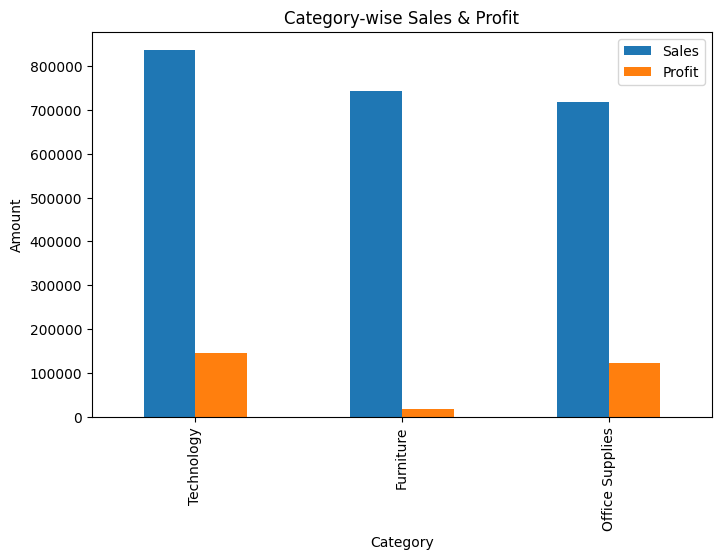

In [11]:
category_summary.plot(kind='bar', figsize=(8,5), title="Category-wise Sales & Profit")
plt.ylabel("Amount")
plt.show()

***Category-level Insights***

**Technology is the best performing category** — highest sales and highest profit.

**Furniture is a problem category** — good sales but very low profit.

**Office Supplies is balanced** — decent sales with healthy profitability.

**Technology is driving most of the company’s earnings, not just revenue.**

**Furniture may have margin issues (high cost, discounting, or returns).**

***Business Recommendations:***

-Increase focus on Technology products (marketing, inventory, bundling).

-Investigate Furniture pricing strategy (discounts, sourcing cost, returns).

-Promote Office Supplies in bulk deals.

-Reduce excessive discounting on Furniture.

-Run profitability audits on Furniture suppliers.

In [12]:
subcat_summary = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)
subcat_summary.head(10)

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [13]:
subcat_summary.sort_values(by='Profit').head(10)


,Sales,Profit
Sub-Category,,
Tables,206965.5320,-17725.4811
Bookcases,114879.9963,-3472.5560
Supplies,46673.5380,-1189.0995
Fasteners,3024.2800,949.5182
Machines,189238.6310,3384.7569
Labels,12486.3120,5546.2540
Art,27118.7920,6527.7870
Envelopes,16476.4020,6964.1767
Furnishings,91705.1640,13059.1436


**Sub-Category Insights**

-Tables and Bookcases are highly unprofitable despite decent sales.

-Machines generate high sales but very low profit, indicating poor margins.

-Copiers, Accessories, and Phones are the company’s strongest profit drivers.

-Supplies contribute to losses and require price/cost optimization.

-Profit is not proportional to sales – not all high-selling products are good for business.

***Recommendations***

Consider stopping or redesigning pricing for Tables and Bookcases.

Investigate supplier and shipping costs for Machines.

Increase inventory and marketing for Copiers, Accessories, Phones.

Reduce discounting in loss-making segments.

Introduce bundling strategies (e.g., Phones + Accessories).

In [14]:
region_summary = df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)
region_summary

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


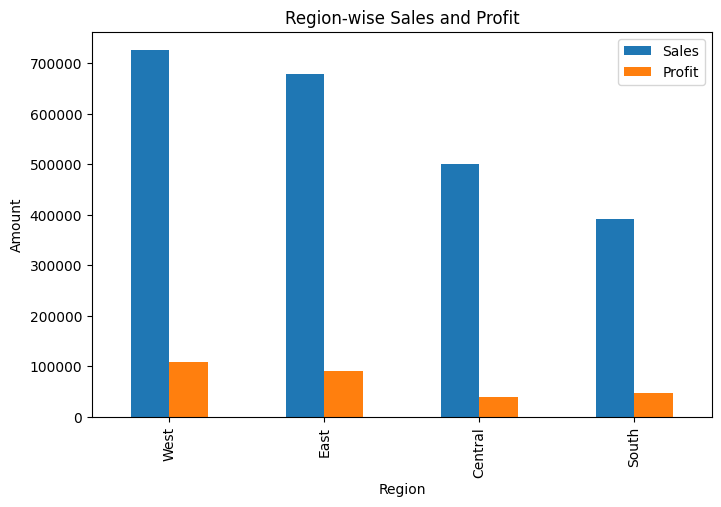

In [15]:
region_summary.plot(kind='bar', figsize=(8,5), title="Region-wise Sales and Profit")
plt.ylabel("Amount")
plt.show()

**Region-level Insights**

West is the best-performing region with highest sales and highest profit.

East is also strong and stable, second in both sales and profit.

Central region generates decent sales but weak profit, indicating margin issues.

South has the lowest sales, but still makes reasonable profit.

Business performance is geographically uneven — some regions are much healthier than others.

**Recommendations**

Increase investment and marketing in West and East regions.

Conduct cost and discount audit in Central region.

Improve supply chain or pricing strategy in underperforming regions.

Explore expansion potential in high-profit regions.

Replicate success strategies from West region into other regions.

In [16]:
state_summary = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)
state_summary.head(10)

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Texas,170188.0458,-25729.3563
Washington,138641.2700,33402.6517
Pennsylvania,116511.9140,-15559.9603
Florida,89473.7080,-3399.3017
Illinois,80166.1010,-12607.8870
Ohio,78258.1360,-16971.3766
Michigan,76269.6140,24463.1876


In [17]:
state_summary.sort_values(by='Profit').head(10)


,Sales,Profit
State,,
Texas,170188.0458,-25729.3563
Ohio,78258.1360,-16971.3766
Pennsylvania,116511.9140,-15559.9603
Illinois,80166.1010,-12607.8870
North Carolina,55603.1640,-7490.9122
Colorado,32108.1180,-6527.8579
Tennessee,30661.8730,-5341.6936
Arizona,35282.0010,-3427.9246
Florida,89473.7080,-3399.3017


**State-Level Insights**

California and New York are the most profitable states and key revenue drivers.

Texas and Ohio generate high losses despite strong sales, indicating serious pricing or cost issues.

Several states consistently perform poorly across profit.

Some states have decent sales but still remain unprofitable.

Business profitability depends strongly on location.

***Recommendations***

Increase operations in California, New York, Washington.

Investigate Texas and Ohio for:

        -High discounts
        
        -Shipping cost
        
        -Returns

        -Supplier inefficiency

Optimize logistics in low-profit states.

Consider exiting or restructuring certain markets.

Run state-wise pricing review.

In [18]:
segment_summary = df.groupby('Segment')[['Sales','Profit']].sum()
segment_summary


,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


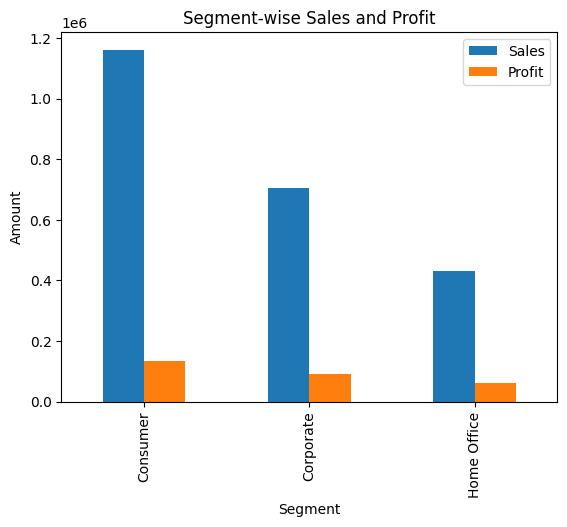

In [19]:
segment_summary.plot(kind='bar', title="Segment-wise Sales and Profit")
plt.ylabel("Amount")
plt.show()


**Segment-Level Insights**

Consumer segment is the largest revenue and profit contributor.

Corporate customers bring high profit with moderate sales volume.

Home Office segment is smaller but stable and profitable.

Profit distribution across segments is healthy — no segment is loss-making.

Business is not overdependent on a single segment.

***Recommendations***

Focus marketing campaigns on Consumer and Corporate segments.

Introduce loyalty programs for frequent consumers.

Offer long-term contracts to corporate clients.

Expand Home Office category with remote work products.

Personalize pricing strategies by segment.

In [20]:
top_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_customers


Customer Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64

In [21]:
worst_customers = df.groupby('Customer Name')['Profit'].sum().sort_values().head(10)
worst_customers


Customer Name
Cindy Stewart      -6626.3895
Grant Thornton     -4108.6589
Luke Foster        -3583.9770
Sharelle Roach     -3333.9144
Henry Goldwyn      -2797.9635
Nathan Cano        -2204.8072
Sean Braxton       -2082.7451
Sean Miller        -1980.7393
Christine Phan     -1850.3029
Natalie Fritzler   -1695.9714
Name: Profit, dtype: float64

****Final Business Summary****

This analysis shows that although revenue is distributed across many products and regions, profits are driven by specific categories, regions, and customers. Management should prioritize profitable segments, optimize loss areas, and redesign discount strategies to improve overall business health.

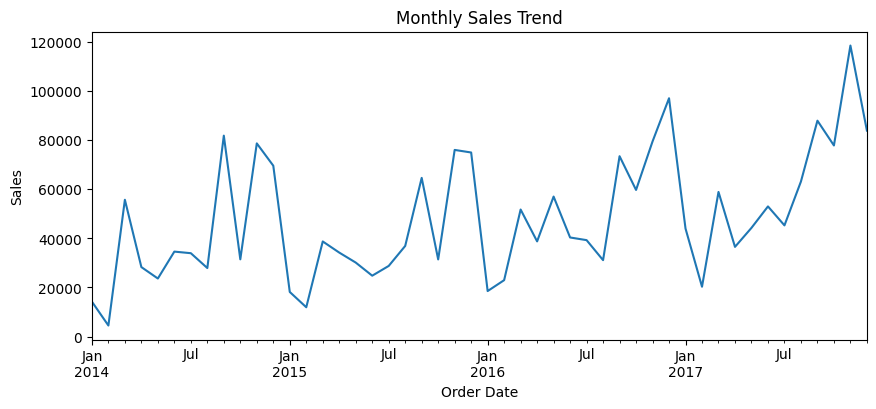

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()
monthly.plot(figsize=(10,4), title="Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


**Observations:**

Sales show a clear upward trend year over year.

There is noticeable seasonality in demand.

End-of-year months consistently perform better.

Sales volatility suggests dependency on seasonal demand.

Business growth trajectory is positive.

***Recommendations Based on Trends***

Increase inventory before high-demand months.

Run promotions in low-sales months.

Forecast demand using historical trends.

Prepare logistics for peak periods.

Optimize cash flow and staffing before sales peaks.



In [23]:
df['Profit Margin'] = df['Profit'] / df['Sales']
df[['Sales','Profit','Profit Margin']].head()


,Sales,Profit,Profit Margin
0,261.9600,41.9136,0.1600
1,731.9400,219.5820,0.3000
2,14.6200,6.8714,0.4700
3,957.5775,-383.0310,-0.4000
4,22.3680,2.5164,0.1125


In [24]:
category_margin = df.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)
category_margin


Category
Technology         0.156138
Office Supplies    0.138030
Furniture          0.038784
Name: Profit Margin, dtype: float64

In [25]:
state_margin = df.groupby('State')['Profit Margin'].mean().sort_values()
state_margin.head(10)   # worst margins


State
Illinois         -0.391677
Texas            -0.342011
Colorado         -0.123755
Pennsylvania     -0.086013
Ohio             -0.073808
Arizona          -0.066399
Oregon           -0.050094
Florida          -0.017953
Tennessee        -0.016794
North Carolina    0.007751
Name: Profit Margin, dtype: float64

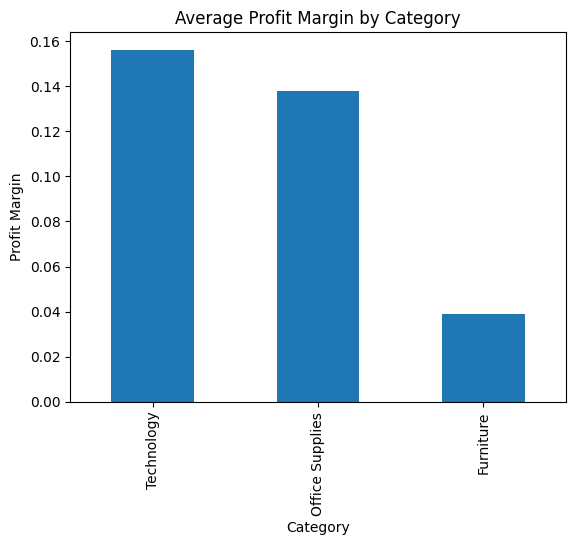

In [26]:
category_margin.plot(kind='bar', title="Average Profit Margin by Category")
plt.ylabel("Profit Margin")
plt.show()


***Profit Margin Insights***

Revenue does not reflect profitability.

Categories with high sales may still have low margins.

Some states show consistently poor margins.

Margin analysis reveals hidden financial leakage.

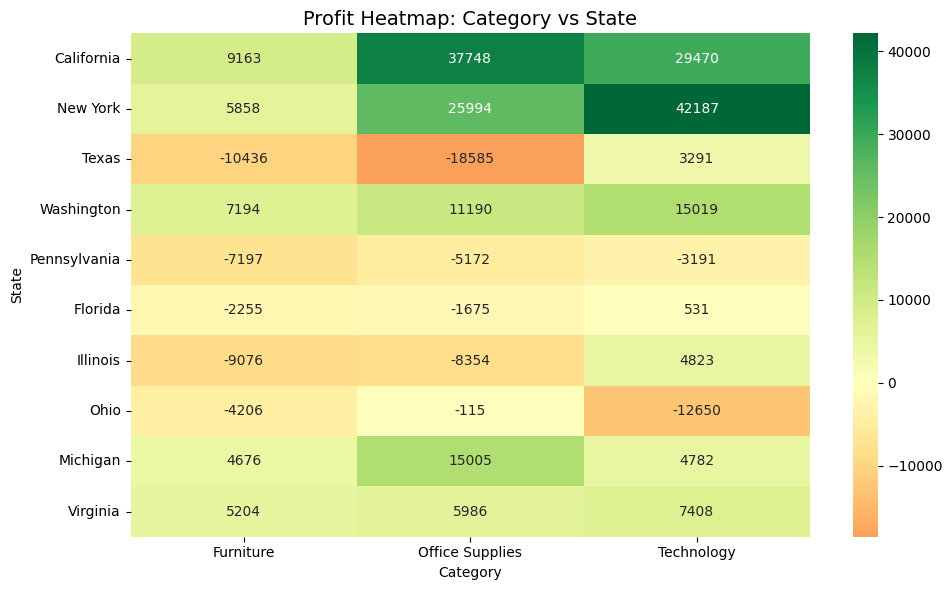

In [27]:
# Build profit matrix (State x Category)
pivot = pd.pivot_table(
    df,
    values='Profit',
    index='State',
    columns='Category',
    aggfunc='sum'
)

# Keep top 10 states by total sales for clarity (optional but recommended)
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).index
pivot = pivot.loc[top_states]

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="RdYlGn", center=0)
plt.title("Profit Heatmap: Category vs State", fontsize=14)
plt.xlabel("Category")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Retail Customer Segmentation Analysis

Now we will perform customer-level segmentation on retail sales data to identify
high-value, average, and loss-making customers based on profitability and behavior.

## Customer-Level Dataset Creation

Instead of analyzing sales at a product or region level, we restructure the dataset so that:
- Each row represents one customer
- Each column describes customer behavior and value

This allows us to analyze customers from a business perspective and prepare data for segmentation.


In [28]:
# Create customer-level table
customer = df.groupby("Customer Name").agg({
    "Sales": "sum",
    "Profit": "sum",
    "Order ID": "count",
    "Discount": "mean"
}).reset_index()

# Add Profit Margin
customer["Profit Margin"] = customer["Profit"] / customer["Sales"]

# See first few customers
customer.head()


,Customer Name,Sales,Profit,Order ID,Discount,Profit Margin
0,Aaron Bergman,886.156,129.3465,6,0.066667,0.145964
1,Aaron Hawkins,1744.700,365.2152,11,0.090909,0.209328
2,Aaron Smayling,3050.692,-253.5746,10,0.355000,-0.083120
3,Adam Bellavance,7755.620,2054.5885,18,0.044444,0.264916
4,Adam Hart,3250.337,281.1890,20,0.135000,0.086511


### Profit Margin Definition

Profit Margin is calculated as:

Profit / Sales

This metric shows how much profit is generated for every unit of revenue.
A negative margin indicates a customer is loss-making.


In [29]:
# Select numerical features for clustering
features = customer[["Sales", "Profit", "Order ID", "Discount", "Profit Margin"]]


## Feature Scaling

Clustering algorithms compare distances between data points.

Since some features (like Sales) have large values and others (like Discount) are small,
we scale all features to similar ranges using standardization.


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Customer Segmentation Using KMeans Clustering

Clustering groups similar customers together based on behavior patterns such as:
- Purchasing volume
- Profitability
- Order frequency
- Discount sensitivity

We use KMeans to automatically assign customers into 3 meaningful segments.


In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
customer["Cluster"] = kmeans.fit_predict(scaled_features)


## Segment Interpretation

Each customer now belongs to one cluster based on pattern similarity.

We interpret these clusters as:

Cluster 0 → Loss-making / High-risk customers  
Cluster 1 → Average / Stable customers  
Cluster 2 → High-value / Profitable customers  


In [33]:
customer.head(10)


,Customer Name,Sales,Profit,Order ID,Discount,Profit Margin,Cluster
0,Aaron Bergman,886.156,129.3465,6,0.066667,0.145964,1
1,Aaron Hawkins,1744.700,365.2152,11,0.090909,0.209328,1
2,Aaron Smayling,3050.692,-253.5746,10,0.355000,-0.083120,0
3,Adam Bellavance,7755.620,2054.5885,18,0.044444,0.264916,2
4,Adam Hart,3250.337,281.1890,20,0.135000,0.086511,1
5,Adam Shillingsburg,3255.310,64.5374,25,0.180000,0.019825,0
6,Adrian Barton,14473.571,5444.8055,20,0.240000,0.376190,2
7,Adrian Hane,1735.514,-2.3146,16,0.237500,-0.001334,0
8,Adrian Shami,58.820,21.8496,3,0.066667,0.371465,1
9,Aimee Bixby,966.710,313.6597,12,0.133333,0.324461,1


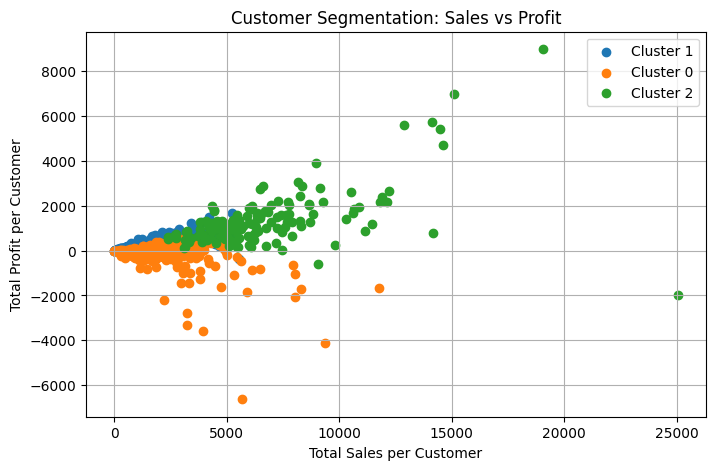

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for cluster in customer["Cluster"].unique():
    clustered = customer[customer["Cluster"] == cluster]
    plt.scatter(clustered["Sales"], clustered["Profit"], label=f"Cluster {cluster}")

plt.xlabel("Total Sales per Customer")
plt.ylabel("Total Profit per Customer")
plt.title("Customer Segmentation: Sales vs Profit")
plt.legend()
plt.grid(True)
plt.show()


## Visualization Interpretation

The cluster visualization shows:

- Customers below the zero-profit line → financial risk
- Top-right region → high-value customers
- Mid-zone → average customers

This confirms that revenue alone is not enough — profit distribution varies significantly across customers.


## Final Business Insights

- Not all customers contribute equally to profit
- A small segment generates most of the business value
- High sales does not always mean high profitability
- Discount-heavy customers often reduce margins

### Recommendations:
- Prioritize high-value customers through retention strategies
- Re-evaluate heavy discounting policies
- Focus marketing efforts on profitable customer segments
